# Exercise 3

$\tau(z) = \frac{c}{H_{0}}\int_{0}^{z_{reion}}n_{0}(z)\sigma(z)\frac{(1+z)^{2}}{\sqrt{\Omega_{m}(1+z)^{3}+\Omega_{\Lambda}}}dz = \int_{0}^{D_{C reion}}n_{0}(z)\sigma(z)(1+z)^{3}\frac{dD_{C}(z)}{1+z}$

## a)

$n_{0} = \frac{3}{4}\frac{3H_{0}^{2}\Omega_{b}}{8\pi G}/m_{H} + \frac{1}{4}\frac{3H_{0}^{2}\Omega_{b}}{8\pi G}/m_{He}$

In [13]:
from scipy.integrate import quad
import numpy as np
from sympy import *

def integrand(z,c,n0,sigma,H0,Omega_m,Omega_lmd):
    return c*n0*sigma*(1+z)**2/(H0*np.sqrt(Omega_m*(1+z)**3+Omega_lmd))

c = 3.0*10**10 #cm s^-1
H0 = 70*10**5/(3.1*10**24) #s^-1
G = 6.7*10**(-8) #cm^3 g^-1 s^-2
m_H = 1.007825*931.494*10**6*1.6*10**-12/(9*10**20)#g
m_He = 4.002603*931.494*10**6*1.6*10**-12/(9*10**20)#g
Omega_b = 0.04

n0 = 0.75*(3*H0**2*Omega_b/(8*np.pi*G))/m_H + 0.25*(3*H0**2*Omega_b/(8*np.pi*G))/m_He

print('Present-day number density of electrons n0:     %.2e'%n0)

Present-day number density of electrons n0:     1.77e-07


## ｂ)

In [2]:
from scipy.integrate import quad
import numpy as np
from scipy.optimize import minimize_scalar

def integrand(z,c,n0,sigma,H0,Omega_m,Omega_lmd):
    return c*n0*sigma*(1+z)**2/(H0*np.sqrt(Omega_m*(1+z)**3+Omega_lmd))

c = 3.0*10**10 #cm s^-1
H0 = 70*10**5/(3.1*10**24) #s^-1
G = 6.7*10**(-8) #cm^3 g^-1 s^-2
m_H = 1.007825*931.494*10**6*1.6*10**-12/(9*10**20)#g
m_He = 4.002603*931.494*10**6*1.6*10**-12/(9*10**20)#g
Omega_b = 0.04
n0 = 0.75*(3*H0**2*Omega_b/(8*np.pi*G))/m_H + 0.25*(3*H0**2*Omega_b/(8*np.pi*G))/m_He
sigma = 6.65*10**(-25) #cm^2
Omega_m = 0.27
Omega_lmd = 0.73

z = np.arange(0,12.1,0.1)
tau = []

for i in range(0,len(z)):
    tau_i = quad(integrand,0,z[i],args=(c,n0,sigma,H0,Omega_m,Omega_lmd))[0]
    tau.append(tau_i)

tau = np.array(tau)

z = np.arange(11.975,11.98,0.0001)
tau = []

for i in range(0,len(z)):
    tau_i = quad(integrand,0,z[i],args=(c,n0,sigma,H0,Omega_m,Omega_lmd))[0]
    tau.append(tau_i)

tau = np.array(tau)

print(tau)

[ 0.08996475  0.08996583  0.08996692  0.089968    0.08996908  0.08997017
  0.08997125  0.08997233  0.08997342  0.0899745   0.08997558  0.08997667
  0.08997775  0.08997883  0.08997992  0.089981    0.08998208  0.08998317
  0.08998425  0.08998533  0.08998642  0.0899875   0.08998859  0.08998967
  0.08999075  0.08999184  0.08999292  0.089994    0.08999509  0.08999617
  0.08999725  0.08999834  0.08999942  0.0900005   0.09000159  0.09000267
  0.09000375  0.09000484  0.09000592  0.090007    0.09000809  0.09000917
  0.09001025  0.09001134  0.09001242  0.09001351  0.09001459  0.09001567
  0.09001676  0.09001784  0.09001892]


from above integral, the $z_{ion}$ is nearly 11.98

## c)

$P = 1 - e^{-\tau}$

$dP/dz = \tau e^{-\tau}d\tau/dz = \tau e^{-\tau}\frac{c}{H_{0}}n_{0}(z)\sigma(z)\frac{(1+z)^{2}}{\sqrt{\Omega_{m}(1+z)^{3}+\Omega_{\Lambda}}}$

$dP/dD_{C} = \tau e^{-\tau}d\tau/dD_{C} = \tau e^{-\tau}n_{0}(z)\sigma(z)(1+z)^{2}$

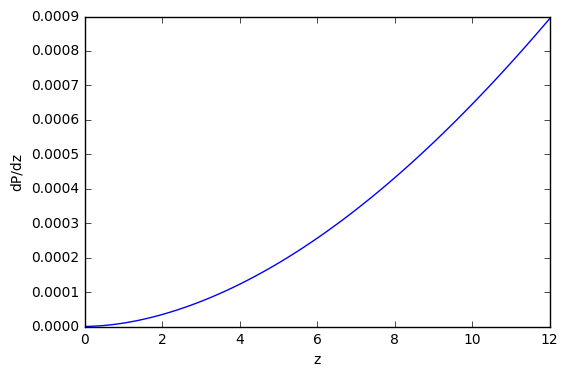

In [5]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

def integrand(z,c,n0,sigma,H0,Omega_m,Omega_lmd):
    return c*n0*sigma*(1+z)**2/(H0*np.sqrt(Omega_m*(1+z)**3+Omega_lmd))

c = 3.0*10**10 #cm s^-1
H0 = 70*10**5/(3.1*10**24) #s^-1
G = 6.7*10**(-8) #cm^3 g^-1 s^-2
m_H = 1.007825*931.494*10**6*1.6*10**-12/(9*10**20)#g
m_He = 4.002603*931.494*10**6*1.6*10**-12/(9*10**20)#g
Omega_b = 0.04
n0 = 0.75*(3*H0**2*Omega_b/(8*np.pi*G))/m_H + 0.25*(3*H0**2*Omega_b/(8*np.pi*G))/m_He
sigma = 6.65*10**(-25) #cm^2
Omega_m = 0.27
Omega_lmd = 0.73

z = np.arange(0,12.1,0.1)
tau = []

for i in range(0,len(z)):
    tau_i = quad(integrand,0,z[i],args=(c,n0,sigma,H0,Omega_m,Omega_lmd))[0]
    tau.append(tau_i)
tau = np.array(tau)

P_dz = tau*np.exp(-tau)*c*n0*sigma*(1+z)**2/(H0*np.sqrt(Omega_m*(1+z)**3+Omega_lmd))

plt.plot(z,P_dz)
plt.xlabel('z')
plt.ylabel('dP/dz')

plt.show()

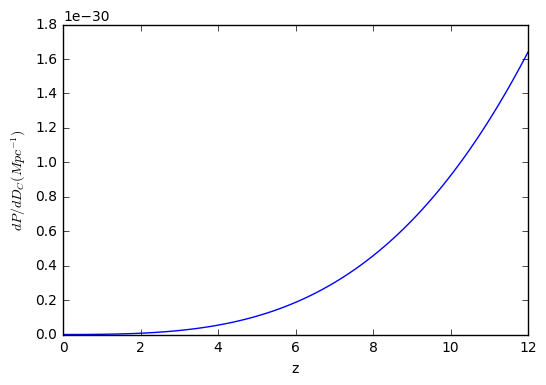

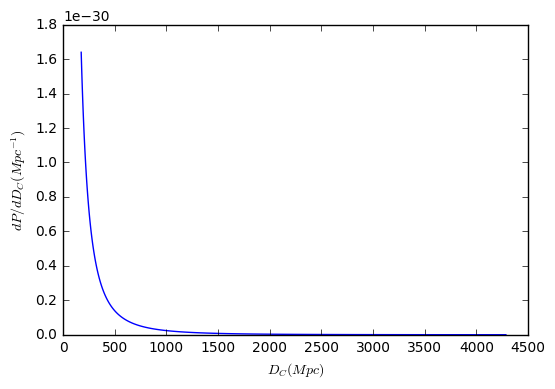

In [12]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

def integrand(z,c,n0,sigma,H0,Omega_m,Omega_lmd):
    return c*n0*sigma*(1+z)**2/(H0*np.sqrt(Omega_m*(1+z)**3+Omega_lmd))

c = 3.0*10**10 #cm s^-1
H0 = 70*10**5/(3.1*10**24) #s^-1
G = 6.7*10**(-8) #cm^3 g^-1 s^-2
m_H = 1.007825*931.494*10**6*1.6*10**-12/(9*10**20)#g
m_He = 4.002603*931.494*10**6*1.6*10**-12/(9*10**20)#g
Omega_b = 0.04
n0 = 0.75*(3*H0**2*Omega_b/(8*np.pi*G))/m_H + 0.25*(3*H0**2*Omega_b/(8*np.pi*G))/m_He
sigma = 6.65*10**(-25) #cm^2
Omega_m = 0.27
Omega_lmd = 0.73

z = np.arange(0,12.1,0.1)
tau = []

for i in range(0,len(z)):
    tau_i = quad(integrand,0,z[i],args=(c,n0,sigma,H0,Omega_m,Omega_lmd))[0]
    tau.append(tau_i)
tau = np.array(tau)

Dc = c/(H0*np.sqrt(Omega_m*(1+z)**3+Omega_lmd)*(3.1*10**24))

dP_dDc = tau*np.exp(-tau)*n0*sigma*(1+z)**2

plt.plot(z,dP_dDc)
plt.xlabel('z')
plt.ylabel('$dP/dD_{C} (Mpc^{-1})$')

plt.show()

plt.plot(Dc,dP_dDc)
plt.xlabel('$D_{C} (Mpc)$')
plt.ylabel('$dP/dD_{C} (Mpc^{-1})$')

plt.show()